# Implementierung Algae Modell

## Bibs und packages 

In [168]:
from copy import deepcopy

In [169]:
%load_ext autoreload
%autoreload 2 
# from mempyDEB.DEBIBM import test
from mempyDEB.DEBIBM.simulators import * # imports functions to run models
from mempyDEB.DEBIBM.defaultparams import * # imports default parameters
from mempyDEB.DEBIBM.model import * #import model
import mempyDEB
#mempyDEB.__file__

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Tes Algae model alone 

In [30]:
p = deepcopy(defaultparams_DEBIBM)
p.glb['Q0'] = 0.1
p.glb['X0'] = 2
p.glb['P0'] = 2
p.glb['Pdot_in'] = p.glb['D'] * p.glb['R0']
#p.glb['tspan'] = (0,14)
p.glb['N_0']= 0 #No Daphnia 
#p.glb['data_collection_interval']=1 #in order to track shorter tie intervalls 
#p.glb['tres']=24
sim_weber = simulate_DEBIBM(p) # runs the baseline model (a variant of DEBkiss)
mout_weber, aout_weber = sim_weber 
mout_weber

100%|██████████| 3/3 [00:01<00:00,  2.85it/s]


index  t_day           X         Q         P  N_tot  M_tot  \
0        0    0.0    2.000000  0.100000  2.000000      0    0.0   
1        1    0.0    2.098393  0.096356  1.967386      0    0.0   
2        2    3.5   83.562629  0.573537  0.077831      0    0.0   
3        3    7.0  163.332718  0.404153  0.005394      0    0.0   
4        4   10.5  143.453752  0.361499  0.006921      0    0.0   
..     ...    ...         ...       ...       ...    ...    ...   
101    101  350.0  139.289765  0.352673  0.007327      0    0.0   
102    102  353.5  139.289765  0.352673  0.007327      0    0.0   
103    103  357.0  139.289765  0.352673  0.007327      0    0.0   
104    104  360.5  139.289765  0.352673  0.007327      0    0.0   
105    105  364.0  139.289765  0.352673  0.007327      0    0.0   

     aging_mortality  starvation_mortality  toxicity_mortality  replicate  C_W  
0                  0                     0                   0          0  0.0  
1                  0                     0                   0          0  0.0  
2                  0                     0                   0          0  0.0  
3                  0                     0                   0          0  0.0  
4                  0                     0                   0          0  0.0  
..               ...                   ...                 ...        ...  ...  
101                0                     0                   0          2  0.0  
102                0                     0                   0          2  0.0  
103                0                     0                   0          2  0.0  
104                0                     0                   0          2  0.0  
105                0                     0                   0          2  0.0  

[318 rows x 12 columns]

Visualize Algae (X), Phosphorus content in the algae population (Q) and extern phosphorus (P). <br> 
Assumptions: <br>
- No Chemichal effect yet, <br>
- Constant phosphorus income 


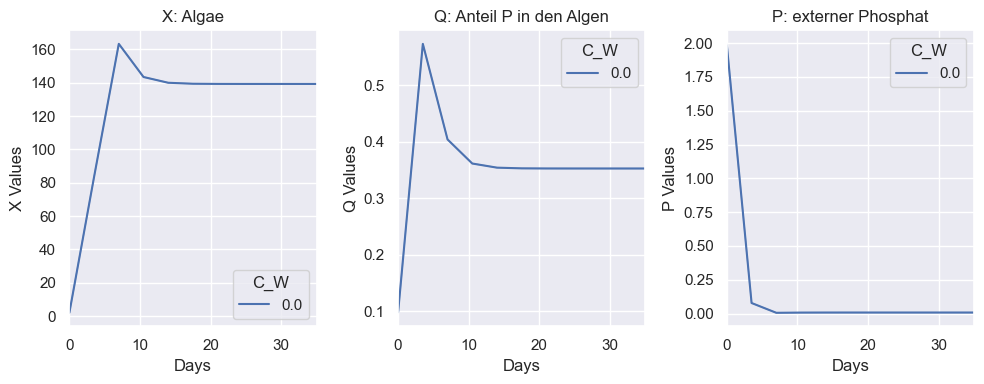

In [31]:
fig, ax = plt.subplots(ncols = 3, figsize = (10,4))

sns.lineplot(data=mout_weber, x='t_day',y='X', ax= ax[0], hue='C_W' )
ax[0].set_title('X: Algae')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('X Values')
ax[0].set_xlim(0,35)

sns.lineplot(data=mout_weber, x='t_day',y='Q', ax= ax[1], hue='C_W' )
ax[1].set_title('Q: Anteil P in den Algen')
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Q Values')
ax[1].set_xlim(0,35)

sns.lineplot(data=mout_weber, x='t_day',y='P', ax= ax[2], hue='C_W' )
ax[2].set_title('P: externer Phosphat')
ax[2].set_xlabel('Days')
ax[2].set_ylabel('P Values')
ax[2].set_xlim(0,35)

plt.tight_layout()
plt.show()

Test and visualize effekt of chemichals in the the algae population: 

In [170]:
p_c = deepcopy(defaultparams_DEBIBM)
p_c.glb['Q0'] = 0.1
p_c.glb['X0'] = 2
p_c.glb['P0'] = 2
p_c.glb['Pdot_in'] = p.glb['D'] * p.glb['R0']
p.glb['tspan'] = (0,50)
p_c.glb['N_0']= 0 #No Daphnia 
#p.glb['data_collection_interval']=1 #in order to track shorter tie intervalls 
#p.glb['tres']=24
C_W_vals = [0, 150, 300] 
sim_chem = exposure_DEBIBM(p_c, C_W_vals)
mout_c, aout_C = sim_chem 


100%|██████████| 3/3 [00:01<00:00,  1.61it/s]


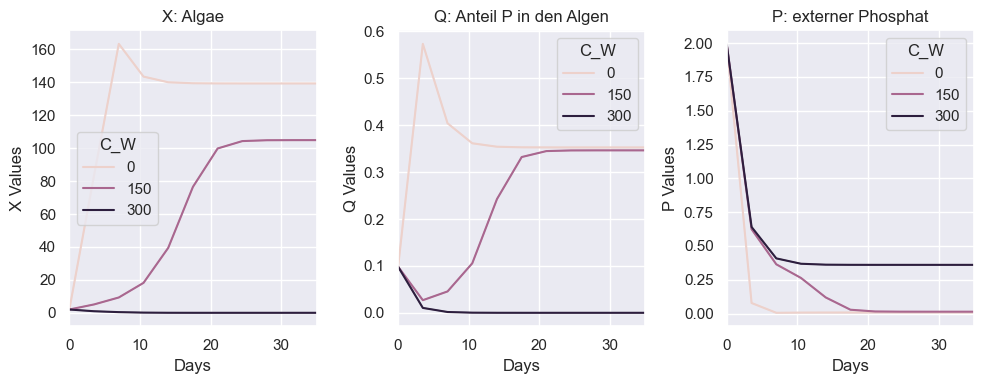

In [40]:
fig, ax = plt.subplots(ncols = 3, figsize = (10,4))

sns.lineplot(data=mout_c, x='t_day',y='X', ax= ax[0], hue='C_W' )
ax[0].set_title('X: Algae')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('X Values')
ax[0].set_xlim(0,35)

sns.lineplot(data=mout_c, x='t_day',y='Q', ax= ax[1], hue='C_W' )
ax[1].set_title('Q: Anteil P in den Algen')
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Q Values')
ax[1].set_xlim(0,35)

sns.lineplot(data=mout_c, x='t_day',y='P', ax= ax[2], hue='C_W' )
ax[2].set_title('P: externer Phosphat')
ax[2].set_xlabel('Days')
ax[2].set_ylabel('P Values')
ax[2].set_xlim(0,35)

plt.tight_layout()
plt.show()

## Algen und Daphnien Population

Here we run the simulations with Daphnia population to see how the dynamics works between Daphnia, Algae and phosphorus

In [182]:
p_dap = deepcopy(defaultparams_DEBIBM)
p_dap.glb['tspan'] = (0,100)
daph_vals = [10, 15, 30]
#p_dap.glb['N_0'] = 10 #No Daphnia 
p_dap.glb['data_collection_interval']=1 #in order to track shorter tie intervalls 
p_dap.glb['Pdot_in'] = 0.4
p_dap.glb['tres'] = 240
p_dap.glb['X0'] = 2
p_dap.glb['Q0'] = .1
p_dap.glb['P0'] = 2
p_dap.glb['C_W'] = 0

sim_dap_arr = []

for i in daph_vals: 
    p_dap.glb['N_0'] = i
    sim_dap = simulate_DEBIBM(p_dap) # runs the baseline model (a variant of DEBkiss)
    sim_dap_arr.append(sim_dap)
#mout_dap, aout_dap = sim_dap

100%|██████████| 3/3 [02:27<00:00, 49.16s/it]


In [183]:
mout_dap, aout_dap = sim_dap_arr[0]
mout_dap

,index,t_day,X,Q,P,N_tot,M_tot,aging_mortality,starvation_mortality,toxicity_mortality,replicate,C_W
0,0,0.0,2.000000,0.100000,2.000000,10,0.067500,0,0,0,0,0
1,1,0.0,2.009839,0.099641,1.997650,10,0.070385,0,0,0,0,0
2,2,1.0,6.185259,0.055283,1.531147,10,2.158035,0,0,0,0,0
3,3,2.0,16.658603,0.129699,1.147060,10,1.383486,0,0,0,0,0
4,4,3.0,47.017774,0.451340,0.637733,8,0.975236,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,95.0,304.335631,0.796510,0.003490,4,18.589508,27,10,0,2,0
97,97,96.0,303.087066,0.796479,0.003521,4,21.542255,27,10,0,2,0
98,98,97.0,301.966241,0.796450,0.003550,4,24.262920,27,10,0,2,0
99,99,98.0,300.971968,0.796424,0.003576,4,26.724811,27,10,0,2,0


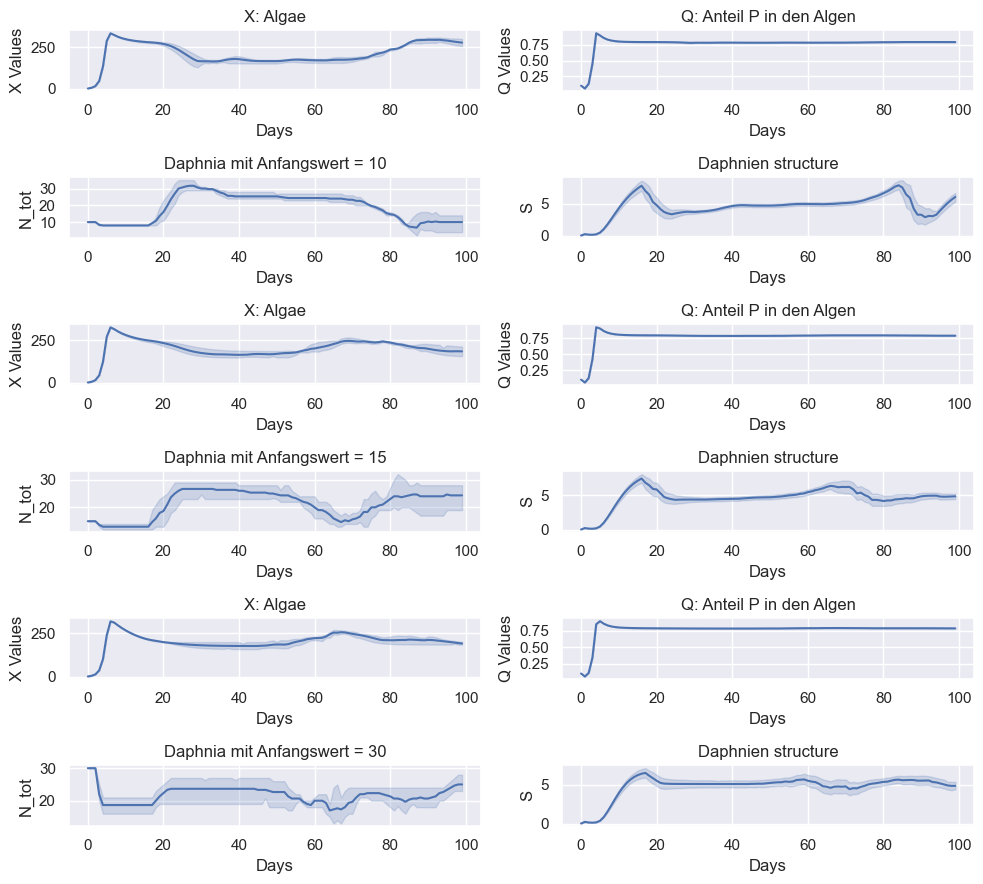

In [190]:
fig, ax = plt.subplots(ncols = 2, nrows= 6, figsize = (10,9))
row_index = 0
daph_ind = 0
for i in sim_dap_arr: 
    mout_dap, aout_dap = i 

    sns.lineplot(data=mout_dap, x='t_day',y='X', ax= ax[row_index,0] )
    ax[row_index,0].set_title('X: Algae')
    ax[row_index,0].set_xlabel('Days')
    ax[row_index,0].set_ylabel('X Values')
    #ax[row_plot1,0].set_xlim(0,365)

    sns.lineplot(data=mout_dap, x='t_day',y='Q', ax= ax[row_index,1] )
    ax[row_index,1].set_title('Q: Anteil P in den Algen')
    ax[row_index,1].set_xlabel('Days')
    ax[row_index,1].set_ylabel('Q Values')
    #ax[row_plot1,1].set_xlim(0,365)
    row_index += 1

    sns.lineplot(data=mout_dap, x='t_day',y='N_tot', ax= ax[row_index, 0] )
    ax[row_index, 0].set_title(f'Daphnia mit Anfangswert = {daph_vals[daph_ind]}')
    ax[row_index, 0].set_xlabel('Days')
    ax[row_index, 0].set_ylabel('N_tot')
    #ax[2].set_xlim(0,365)

    sns.lineplot(data=aout_dap, x='t_day',y='S', ax= ax[row_index, 1] )
    ax[row_index, 1].set_title('Daphnien structure')
    ax[row_index, 1].set_xlabel('Days')
    ax[row_index, 1].set_ylabel('S')
    #ax[3].set_xlim(0,365)
    row_index += 1
    daph_ind += 1


plt.tight_layout()
plt.show()

In [45]:
p_D = deepcopy(defaultparams_DEBIBM)
p_D.glb['tspan'] = (0,365)
p_D.glb['N_0'] = 10 #No Daphnia 
p_D.glb['data_collection_interval']=1 #in order to track shorter tie intervalls 
p_D.glb['Pdot_in'] = 0.4
p_D.glb['tres'] = 240
p_D.glb['X0'] = 2
p_D.glb['Q0'] = .1
p_D.glb['P0'] = 2
p_D.glb['C_W'] = 0
sim_daphnia = simulate_DEBIBM(p_D) # runs the baseline model (a variant of DEBkiss)
mout_daphnia, aout = sim_daphnia 

100%|██████████| 3/3 [02:48<00:00, 56.22s/it]


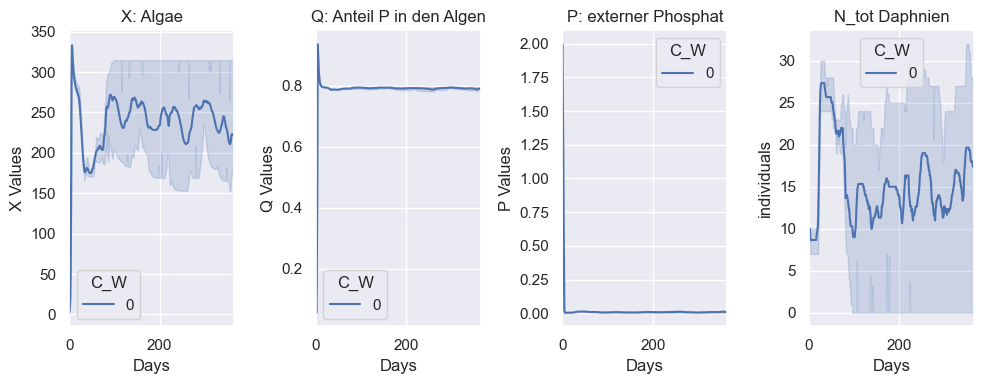

In [46]:
fig, ax = plt.subplots(ncols = 4, figsize = (10,4))

sns.lineplot(data=mout_daphnia, x='t_day',y='X', ax= ax[0], hue='C_W' )
ax[0].set_title('X: Algae')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('X Values')
ax[0].set_xlim(0,365)

sns.lineplot(data=mout_daphnia, x='t_day',y='Q', ax= ax[1], hue='C_W' )
ax[1].set_title('Q: Anteil P in den Algen')
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Q Values')
ax[1].set_xlim(0,365)

sns.lineplot(data=mout_daphnia, x='t_day',y='P', ax= ax[2], hue='C_W' )
ax[2].set_title('P: externer Phosphat')
ax[2].set_xlabel('Days')
ax[2].set_ylabel('P Values')
ax[2].set_xlim(0,365)

sns.lineplot(data=mout_daphnia, x='t_day',y='N_tot', ax= ax[3], hue='C_W' )
ax[3].set_title('N_tot Daphnien')
ax[3].set_xlabel('Days')
ax[3].set_ylabel('individuals')
ax[3].set_xlim(0,365)

plt.tight_layout()
plt.show()